In [1]:
import os
# Set working directory
os.chdir("D:/ACP")  # Windows path fix: use forward slash or raw string

print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\ACP


In [2]:
import pandas as pd
import joblib
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the datasets (datasets were already splited and saved as csv files, 80,20 split)
train_data = pd.read_csv("acp_train_data.csv") #train data
test_data = pd.read_csv("acp_test_data.csv") #test data
# Step 2: Separate labels and features
y_train, X_train = train_data.iloc[:, 2], train_data.iloc[:, 3:] # third column: Label, # from fourth column onward: features
y_test, X_test = test_data.iloc[:, 2], test_data.iloc[:, 3:]

In [4]:
# Step 4: Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],           # Regularization strength (inverse of penalty), [0.001, 0.01, 0.1, 1, 10, 100], default value=1.0
    'penalty': ['l2', 'l1'],               # Regularization type (l1 = Lasso, l2 = Ridge)['l1', 'l2'] (use 'elasticnet' with caution), default=l2
    'solver': ['liblinear', 'saga'],               # Solver that supports l1 and l2, ['liblinear', 'saga'] (for l1 or imbalanced data), default= lbfgs
    'max_iter': [100, 200, 500, 700, 1000],           # Maximum number of iterations to converge, [100, 200, 500, 1000], default =100
    'class_weight': [None, 'balanced']     # Handles class imbalance, [None, 'balanced'], default=none
}

# Step 5: Grid Search with Cross-Validation
logreg = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='accuracy', n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 6: Best model
best_logreg_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 6: Use the best model from GridSearchCV
best_logreg_model = grid_search.best_estimator_

# Save best hyperparameters to a file
with open('best_model_info_.txt', 'w') as f:
    f.write("Best Hyperparameters:\n")
    for param, value in grid_search.best_params_.items():
        f.write(f"{param}: {value}\n")

print("Best model information has been saved to 'best_model_info_logreg.txt'")

#save best model to a file
joblib.dump(best_logreg_model, "best_logreg_model.pkl")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   3.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   3.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   3.2s
[CV] END C=0.001, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   2.6s
[CV] END C=0.001, class_weight=None, max_iter=100, penal

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   6.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   5.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.6s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END C=0.01, class_weight=None,

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   6.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   6.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.3s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=0.01, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   6.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   5.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.7s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   9.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   9.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   6.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   9.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   9.6s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  14.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  12.3s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  12.6s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=   6.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  12.3s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  19.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  17.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  18.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  19.0s
[CV] END C=0.1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  11.8s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  18.6s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  17.2s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  12.6s
[CV] END C=0.1, class_weight=None, max_iter=5

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   5.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   6.8s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   8.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  10.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  10.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   6.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  10.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   9.9s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  15.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  12.1s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  14.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=   7.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  15.8s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  16.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  20.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  17.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  20.0s
[CV] END C=0.1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  14.7s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  15.5s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  22.1s
[CV] END C=0.1, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  13.5s
[CV] 

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   4.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   5.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.0s
[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  10.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   6.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  10.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   8.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=   8.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  12.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  15.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  12.3s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  17.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  20.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  17.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  17.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  16.8s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  19.5s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  20.4s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  18.5s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  17.9s
[CV] END C=1, class_weight=None, max_iter=500, penalty=l2, solver

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  45.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  45.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  47.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  44.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  47.3s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  17.2s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  22.2s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  18.7s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  19.0s
[CV] END C=1, class_weight=None, max_iter=700, penalty=l2, solver

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.1min
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=  17.1s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=  22.2s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=  18.1s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=  22.3s
[CV] END C=1, class_weight=None, max_iter=1000, penalty=

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.6min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.6min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min
[CV] END C=1, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.0s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   8.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  10.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   9.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  10.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=   9.1s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  14.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  16.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  15.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  12.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  15.7s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  20.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  17.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  20.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  17.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  19.7s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  21.1s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  18.5s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  21.8s
[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  18.5s
[CV] END C=1, class_weigh

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  47.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  47.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  47.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  47.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  47.9s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  20.8s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  22.2s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  18.3s
[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  21.9s
[CV] END C=1, class_weigh

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time=  51.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time=  52.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time=  52.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time=  56.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time=  56.5s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=  17.8s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=  19.0s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=  17.9s
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time=  16.8s
[CV] END C=1, cl

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min
[CV] END C=1, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   5.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   8.0s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  11.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  12.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  13.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  10.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  13.3s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  14.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  13.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  15.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  12.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  15.9s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  23.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  24.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  22.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  22.7s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  35.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  35.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  35.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  35.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  36.4s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  54.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  54.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  53.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  51.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  54.0s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  50.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  50.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  51.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  50.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  48.3s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.3min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.3min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.2min
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.1min
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.8min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.7min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.4min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.4min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 1.5min
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   4.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   6.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   6.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.5s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  11.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  10.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  11.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  12.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  10.4s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  12.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  12.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  13.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  12.1s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  22.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  21.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  22.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  22.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  23.0s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  32.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  35.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  35.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  31.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  35.7s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  51.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  51.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  54.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  51.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  53.7s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  47.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  50.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  47.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  51.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  51.0s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.2min
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.0min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.1min
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.7min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.7min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.7min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.7min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 1.7min
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   7.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   8.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   4.6s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  14.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  15.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  15.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  12.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=100, penalty=l1, solver=saga; total time=  14.8s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  15.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  14.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  14.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  15.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=  15.7s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  26.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  29.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  26.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  29.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=200, penalty=l1, solver=saga; total time=  27.0s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  35.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  28.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  29.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  29.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l2, solver=saga; total time=  28.4s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time=  58.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time= 1.0min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time= 1.0min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time= 1.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=500, penalty=l1, solver=saga; total time= 1.0min
[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  48.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  49.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  49.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  48.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l2, solver=saga; total time=  48.1s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=700, penalty=l1, solver=saga; total time= 1.5min
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 2.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 2.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 2.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=None, max_iter=1000, penalty=l1, solver=saga; total time= 2.2min
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   8.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   5.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   7.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l2, solver=saga; total time=   8.1s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  15.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  15.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  12.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  15.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=100, penalty=l1, solver=saga; total time=  14.7s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=liblinear; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  13.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  14.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  15.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  16.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l2, solver=saga; total time=  12.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  30.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  26.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  30.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  26.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=200, penalty=l1, solver=saga; total time=  30.0s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  35.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  35.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  39.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  35.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l2, solver=saga; total time=  36.1s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  57.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  58.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=500, penalty=l1, solver=saga; total time=  57.0s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  45.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  43.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  44.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  44.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l2, solver=saga; total time=  46.3s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.5min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=700, penalty=l1, solver=saga; total time= 1.5min
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l2, solver=saga; total time= 1.2min
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, class_weight=balanced, max_iter=1000, penalty=l1, solver=saga; total time= 2.1min
Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best model information has been saved to 'best_model_info_logreg.txt'


['best_logreg_model.pkl']

In [11]:
# Step 8: Fit the model on the training data
best_logreg_model.fit(X_train, y_train)

# Evaluate on the test dataset
y_test_pred = best_logreg_model.predict(X_test)
y_test_prob = best_logreg_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy, classification reports, and confusion matrices
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"logreg Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrices
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)

# Sensitivity and Specificity calculation
def calculate_sensitivity_specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

sensitivity_test, specificity_test = calculate_sensitivity_specificity(confusion_matrix_test)
print("Test Data - Sensitivity:", sensitivity_test, "Specificity:", specificity_test)

logreg Test Accuracy: 81.62%
Confusion Matrix (Test Data):
 [[71 20]
 [14 80]]
Test Data - Sensitivity: 0.851063829787234 Specificity: 0.7802197802197802


In [6]:
print("Confusion Matrix (Test Data):")
print(f"TN: {confusion_matrix_test[0,0]}  FP: {confusion_matrix_test[0,1]}")
print(f"FN: {confusion_matrix_test[1,0]}  TP: {confusion_matrix_test[1,1]}")

Confusion Matrix (Test Data):
TN: 71  FP: 20
FN: 14  TP: 80


In [7]:
from sklearn.metrics import f1_score
# calculation of F1 score
f1_test = f1_score(y_test, y_test_pred)
print("F1 Score (Test Data):", f1_test)

#calculation of classification report for test and evaluation data
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
# Compute metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)

F1 Score (Test Data): 0.8247422680412371
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        91
           1       0.80      0.85      0.82        94

    accuracy                           0.82       185
   macro avg       0.82      0.82      0.82       185
weighted avg       0.82      0.82      0.82       185

Precision: 0.8
Recall: 0.851063829787234
F1 Score: 0.8247422680412371
Matthews Correlation Coefficient (MCC): 0.6332856890886263


Test Data ROC AUC: 0.899929857376666
Test Data FPR: [0.         0.         0.         0.01098901 0.01098901 0.02197802
 0.02197802 0.03296703 0.03296703 0.04395604 0.04395604 0.06593407
 0.06593407 0.07692308 0.07692308 0.08791209 0.08791209 0.0989011
 0.0989011  0.13186813 0.13186813 0.14285714 0.14285714 0.15384615
 0.15384615 0.16483516 0.16483516 0.20879121 0.20879121 0.23076923
 0.23076923 0.28571429 0.28571429 0.30769231 0.30769231 0.31868132
 0.31868132 0.42857143 0.42857143 0.46153846 0.46153846 0.48351648
 0.48351648 0.50549451 0.50549451 0.56043956 0.56043956 0.58241758
 0.58241758 0.64835165 0.64835165 0.85714286 0.85714286 1.        ]
Test Data TPR: [0.         0.0106383  0.35106383 0.35106383 0.43617021 0.43617021
 0.59574468 0.59574468 0.60638298 0.60638298 0.62765957 0.62765957
 0.63829787 0.63829787 0.64893617 0.64893617 0.65957447 0.65957447
 0.70212766 0.70212766 0.73404255 0.73404255 0.77659574 0.77659574
 0.82978723 0.82978723 0.84042553 0.84042553 0.85106383 0.8510

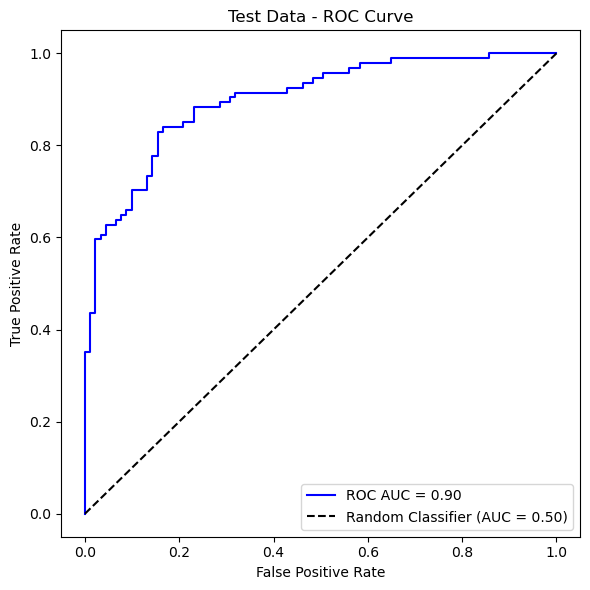

In [8]:
# Evaluate on the test dataset
y_test_pred = best_logreg_model.predict(X_test)
y_test_prob = best_logreg_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC for test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the values
print("Test Data ROC AUC:", roc_auc_test)
print("Test Data FPR:", fpr_test)
print("Test Data TPR:", tpr_test)
print("Test Data Thresholds:", thresholds_test)

# Create a plot
fig, ax = plt.subplots(figsize=(6, 6))  # This defines 'ax' properly

# Plot ROC curve
ax.plot(fpr_test, tpr_test, label=f"ROC AUC = {roc_auc_test:.2f}", color="blue")
ax.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
ax.set_title("Test Data - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("logreg_roc_auc_curve.png", dpi=500)
print("ROC curve saved as 'logreg_roc_auc_curve.png'.")

# Show the plot
plt.show()

In [9]:
# Perform 10-fold cross-validation on the best model
cross_val_scores = cross_val_score(best_logreg_model, X_train, y_train, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean 10-Fold CV Accuracy:", cross_val_scores.mean())

# save accuracy of each fold to a text file
with open('cv_accuracies_logreg.txt', 'w') as f:
    f.write("Cross-Validation Accuracies for each fold:\n")
    for i, score in enumerate(cross_val_scores):
        f.write(f"Fold {i+1} Accuracy: {score:.4f}\n")

print("Accuracy of each fold has been saved to 'cv_accuracies_logreg.txt'")

10-Fold Cross-Validation Accuracy Scores: [0.77027027 0.90540541 0.71621622 0.82432432 0.72972973 0.77027027
 0.7972973  0.75675676 0.79452055 0.83561644]
Mean 10-Fold CV Accuracy: 0.790040725657164
Accuracy of each fold has been saved to 'cv_accuracies_logreg.txt'


Mean Accuracy: 79.00
Mean AUC: 0.9857


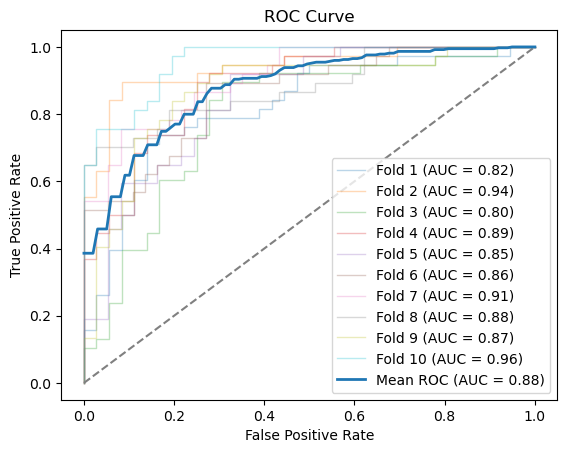

In [10]:
# make roc curve of all folds with mean auc and mean accuracy printed on the plot
mean_accuracy = cross_val_scores.mean() * 100
print(f"Mean Accuracy: {mean_accuracy:.2f}")
# Step 6: Generate ROC Curve
mean_auc = roc_auc_score(y_train, best_logreg_model.predict_proba(X_train)[:, 1])
print(f"Mean AUC: {mean_auc:.4f}")

cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
    best_logreg_model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_prob = best_logreg_model.predict_proba(X_train.iloc[test_idx])[:, 1]
    fpr, tpr, _ = roc_curve(y_train.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("cv_roc_curve_logreg.png", dpi=500)
plt.show()